In [1]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_roman_char():
    psf_url = "https://raw.githubusercontent.com/RomanSpaceTelescope/roman-technical-information/refs/heads/main/data/WideFieldInstrument/Imaging/PointSpreadFunctions/SummaryPSFstats_center.ecsv"
    zp_url = "https://raw.githubusercontent.com/RomanSpaceTelescope/roman-technical-information/refs/heads/main/data/WideFieldInstrument/Imaging/ZeroPoints/Roman_zeropoints_20240301.ecsv"
    thermal_url = "https://raw.githubusercontent.com/RomanSpaceTelescope/roman-technical-information/refs/heads/main/data/WideFieldInstrument/Imaging/Backgrounds/internal_thermal_backgrounds.ecsv"
    zodiacal_url = "https://raw.githubusercontent.com/RomanSpaceTelescope/roman-technical-information/refs/heads/main/data/WideFieldInstrument/Imaging/ZodiacalLight/zodiacal_light.ecsv"

    psf_table = Table.read(psf_url,format="csv",comment="#").to_pandas()
    zp_table = Table.read(zp_url,format="csv",comment="#",delimiter=" ").to_pandas()
    thermal_table = Table.read(thermal_url,format="csv",comment="#").to_pandas()
    zodiacal_table = Table.read(zodiacal_url,format="csv",comment="#").to_pandas()

    return {"psf_table":psf_table,
            "zp_table":zp_table,
            "thermal_table":thermal_table,
            "zodiacal_min_table":zodiacal_table,
           }

In [3]:
roman_char = get_roman_char()

In [4]:
psf = roman_char["psf_table"]
psf = psf.loc[psf.SCA==1]
psf

,SCA,Filter,FWHM,N_Eff_Pix,tot_flux,peak_flux
0,1,F062,0.055,3.80,0.98965,0.49536
1,1,F087,0.073,4.04,0.98583,0.48384
2,1,F106,0.087,4.83,0.98261,0.44004
3,1,F129,0.106,6.63,0.97992,0.36874
4,1,F146,0.105,7.37,0.97907,0.34546
5,1,F158,0.128,9.65,0.97730,0.29081
6,1,F184,0.146,15.52,0.97300,0.21361
7,1,F213,0.169,20.14,0.96944,0.17052


In [5]:
zp = roman_char["zp_table"]
zp = zp.loc[zp.detector == "WFI01"]
zp

,detector,element,VegaMag,ABMag,STMag,FLAM,FNU,PHOTLAM,PHOTNU
0,WFI01,F062,26.417663,26.575519,26.880633,6.423133e-20,8.507310e-31,2.037526e-08,2.698662e-19
1,WFI01,F087,25.626924,26.226243,27.242258,4.603590e-20,1.173554e-30,2.025972e-08,5.164635e-19
2,WFI01,F106,25.648816,26.315214,27.760743,2.855637e-20,1.081220e-30,1.531589e-08,5.799005e-19
3,WFI01,F129,25.290631,26.319402,28.174525,1.950698e-20,1.077058e-30,1.263421e-08,6.975852e-19
4,WFI01,F158,24.992665,26.322511,28.628586,1.284002e-20,1.073979e-30,1.023563e-08,8.561392e-19
5,WFI01,F184,24.292674,25.854602,28.490403,1.458273e-20,1.652567e-30,1.353108e-08,1.533391e-18
6,WFI01,F146,26.374870,27.538551,29.631552,5.097757e-21,3.504125e-31,3.683944e-09,2.532290e-19
7,WFI01,F213,23.973363,25.814939,28.771875,1.125253e-20,1.714054e-30,1.210517e-08,1.843933e-18


In [6]:
thermal = roman_char["thermal_table"]
thermal

,filter,rate
0,F062,0.003
1,F087,0.003
2,F106,0.003
3,F129,0.003
4,F158,0.048
5,F184,0.155
6,F213,4.380
7,F146,1.030


In [7]:
zodiacal = roman_char["zodiacal_min_table"]
zodiacal

,filter,rate
0,F062,0.250
1,F087,0.251
2,F106,0.277
3,F129,0.267
4,F158,0.244
5,F184,0.141
6,F213,0.118
7,F146,0.781


In [8]:
apt_table_file = "roman_opsim/unknown.sim.ecsv"
apt_table = Table.read(apt_table_file, format="ascii.ecsv").to_pandas()
apt_table

,RA,DEC,PA,BANDPASS,MA_TABLE_NUMBER,DURATION,PLAN,PASS,SEGMENT,OBSERVATION,VISIT,EXPOSURE
0,242.979264,52.422581,0.0,F062,1001,112,1,1,1,1,1,1
1,242.379634,52.633959,0.0,F062,1001,112,1,1,1,1,2,1
2,241.774214,52.842376,0.0,F062,1001,112,1,1,1,1,3,1
3,241.163029,53.047733,0.0,F062,1001,112,1,1,1,1,4,1
4,240.546111,53.249928,0.0,F062,1001,112,1,1,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54526,60.450763,-49.398667,0.0,F087,1013,248,1,316,1,8,12,1
54527,60.330981,-48.885568,0.0,F087,1013,248,1,316,1,8,13,1
54528,59.771819,-48.680325,0.0,F087,1013,248,1,316,1,8,14,1
54529,59.217146,-48.472403,0.0,F087,1013,248,1,316,1,8,15,1


In [9]:
apt_table.BANDPASS.unique()

array(['F062', 'F106', 'F129', 'F158', 'F184', 'F087', 'PRISM'],
      dtype=object)

In [10]:
apt_table.OBSERVATION.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

,RA,DEC,PA,BANDPASS,MA_TABLE_NUMBER,DURATION,PLAN,PASS,SEGMENT,OBSERVATION,VISIT,EXPOSURE
2232,63.940512,-49.114734,0.0,F087,1004,140,1,9,1,11,1,1
2233,63.383543,-48.904136,0.0,F087,1004,140,1,9,1,11,2,1
2234,62.831278,-48.690824,0.0,F087,1004,140,1,9,1,11,3,1
2235,62.283737,-48.474889,0.0,F087,1004,140,1,9,1,11,4,1
2236,61.740936,-48.256422,0.0,F087,1004,140,1,9,1,11,5,1
2237,61.658392,-47.740461,0.0,F087,1004,140,1,9,1,11,6,1
2238,65.112205,-48.603616,0.0,F087,1004,140,1,9,1,11,7,1
2239,64.556143,-48.398640,0.0,F087,1004,140,1,9,1,11,8,1
2240,64.004493,-48.190913,0.0,F087,1004,140,1,9,1,11,9,1
2241,63.457282,-47.980523,0.0,F087,1004,140,1,9,1,11,10,1


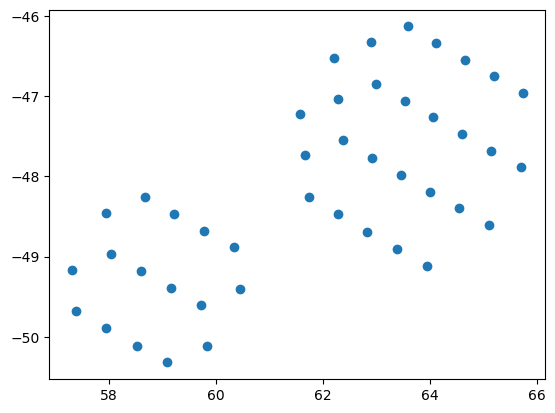

In [11]:
t = apt_table[(apt_table.PASS == 9) & (apt_table.BANDPASS == "F087")]
plt.plot(t.RA,t.DEC,'o')
t

In [12]:
mat_table_file = "roman_characterization/roman_wfi_imaging_multiaccum_tables_with_exptime.csv"
mat_table = pd.read_csv(mat_table_file)
mat_table

,MATableNumber,MATableName,Exptime,Description
0,1001,IM_60_6_S,60,"Imaging, ~60s, 5 resultants, sparse fields only"
1,1002,IM_60_6,60,"Imaging, ~60s, 5 resultants"
2,1003,IM_76_7_S,76,"Imaging, ~76s, 6 resultants, sparse fields only"
3,1004,IM_85_7,85,"Imaging, ~85s, 6 resultants"
4,1005,IM_95_7,95,"Imaging, ~95s, 6 resultants"
5,1006,IM_101_7,101,"Imaging, ~101s, 6 resultants"
6,1007,IM_107_7,107,"Imaging, ~107s, 6 resultants"
7,1008,IM_107_8_S,107,"Imaging, ~107s, 7 resultants, sparse fields only"
8,1009,IM_120_8,120,"Imaging, ~120s, 7 resultants"
9,1010,IM_135_8,135,"Imaging, ~135s, 7 resultants"
